# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import statistics
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
import numpy as np
import math

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
# your code here
rolldice = lambda : pd.DataFrame([random.choices([1,2,3,4,5,6]) for i in range(10)])
dice = rolldice()
dice.columns=['roll']
dice

,roll
0,4
1,2
2,1
3,6
4,4
5,3
6,5
7,3
8,6
9,4


#### 2.- Plot the results sorted by value.

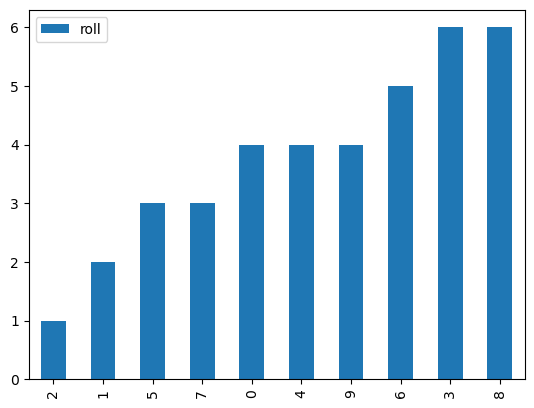

In [4]:
# your code here
dice.sort_values(by='roll')
dice.sort_values(by='roll').plot.bar();

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

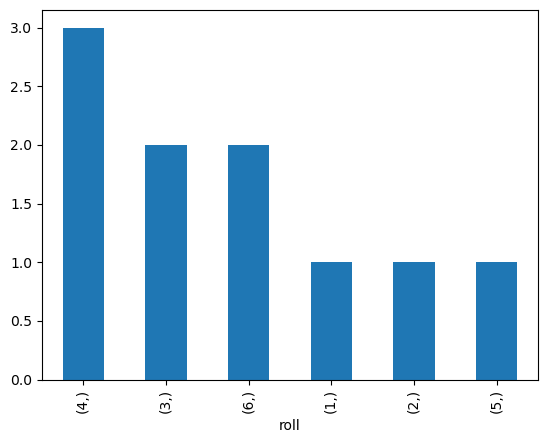

In [5]:
# your code here
freq= dice.value_counts()
freq.plot.bar();

In [ ]:
"""
your comments here
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
my_mean = lambda ls: np.sum(ls)/len(ls)
my_mean(dice['roll'].to_list())

3.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [13]:
# your code here
freq= dice.value_counts()
freq_dist = freq.reset_index()
freq_dist.columns = ['roll', 'times']
freq_dist

,roll,times
0,4,3
1,3,2
2,6,2
3,1,1
4,2,1
5,5,1


In [14]:
np.sum(freq_dist['times']*freq_dist['roll'])/np.sum(freq_dist['times'])

3.8

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [15]:
# your code here
def my_median(ls: list) -> int:
    mylen = len(ls)
    ls = sorted(ls)
    if mylen % 2 == 0:
        idx_up = int(mylen/2)
        idx_down = int(mylen/2 - 1)

        return (ls[idx_up] +ls[idx_down])/2

    else:
        return ls[int(math.floor(mylen/2))]
my_median(dice['roll'].to_list())

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [17]:
# your code here
def get_quarts(ls: list) -> list:
    mylen = len(ls)
    ls = sorted(ls)

    if mylen % 2 == 0:
        idx_up = int(mylen/2)
        idx_down = int(mylen/2 - 1)
        q2_idx = int(mylen/2)
        q2 = (ls[idx_up] +ls[idx_down])/2

    else:
        q2_idx = int(math.floor(mylen/2))
        q2 = ls[q2_idx]     

    l1 = ls[:q2_idx]
    print(l1)
    l2 = ls[q2_idx:]
    print(l2)
    q1 = my_median(l1)
    q3 = my_median(l2)
    return [q1, q2, q3]
get_quarts(dice['roll'].to_list())

[1, 2, 3, 3, 4]
[4, 4, 5, 6, 6]


[3, 4.0, 5]

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

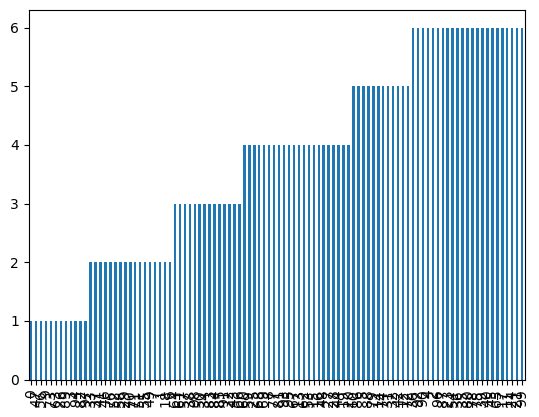

In [18]:
# your code here
hun_dice = pd.read_csv(r'C:\Users\James\Downloads\roll_the_dice_hundred.csv')
hun_dice['value'].sort_values().plot.bar();

In [ ]:
"""
your comments here/4 is more common, and 5 is least common 
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [19]:
# your code here
my_mean(hun_dice['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [20]:
# your code here
freq = hun_dice['value'].value_counts()
freq_dist = freq.reset_index()
freq_dist.columns = ['value', 'times']
freq_dist.sort_values(by='value', inplace=True)
freq_dist

,value,times
4,1,12
2,2,17
3,3,14
1,4,22
5,5,12
0,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

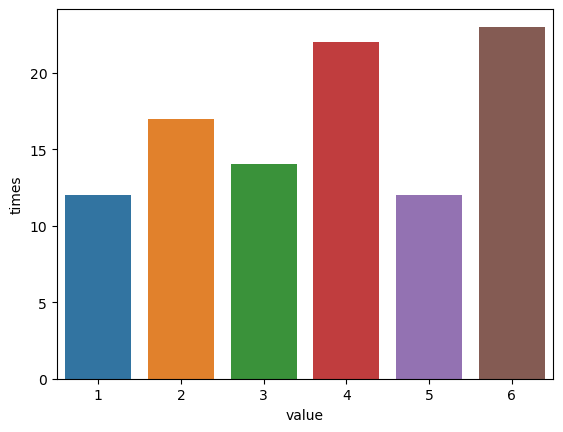

In [21]:
# your code here
sns.barplot(data=freq_dist, x='value', y='times');

In [ ]:
"""
your comments here: the mean is closer to 4
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

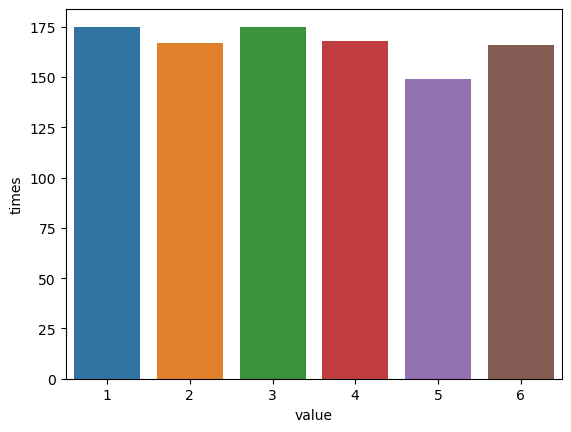

In [22]:
# your code here
th_dice = pd.read_csv(r'C:\Users\James\Downloads\roll_the_dice_thousand.csv')
freq = th_dice['value'].value_counts()
freq_dist = freq.reset_index()
freq_dist.columns = ['value', 'times']
freq_dist.sort_values(by='value', inplace=True)
sns.barplot(data=freq_dist, x='value', y='times');

In [ ]:
"""
The distribution now seems more even between all the possible dice values
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

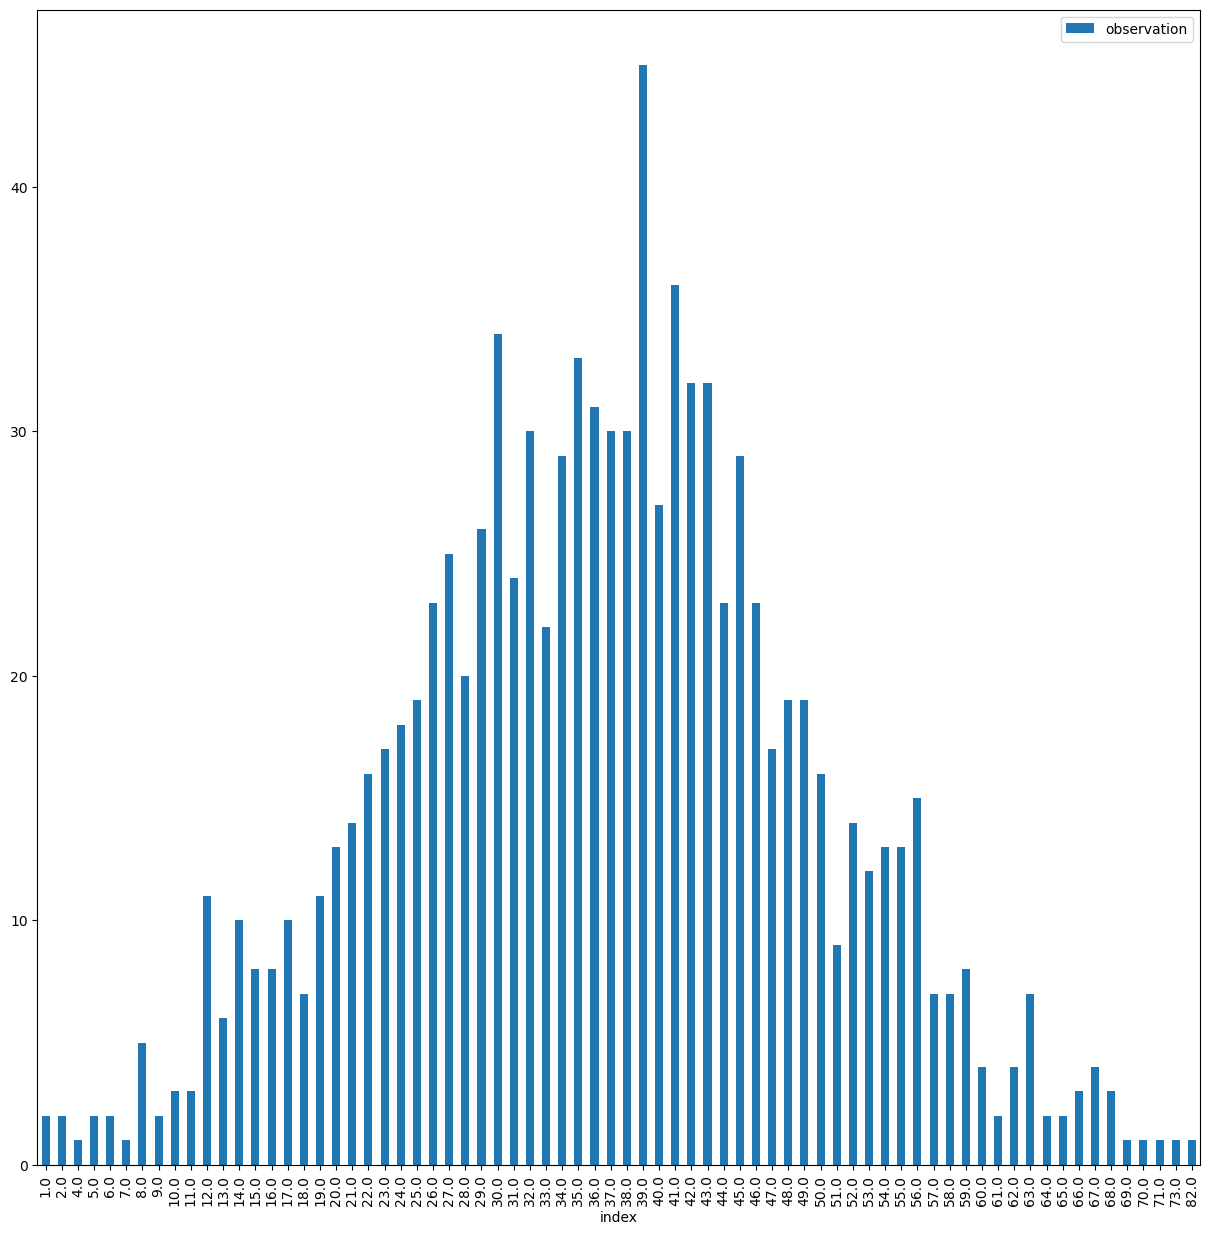

In [24]:
# your code here
ages = pd.read_csv(r'C:\Users\James\Downloads\ages_population.csv')

ages['observation'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index',figsize=(15,15));

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [27]:
# your code here
ages['observation'].mean()

36.56

In [28]:
ages['observation'].std()

12.816499625976762

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

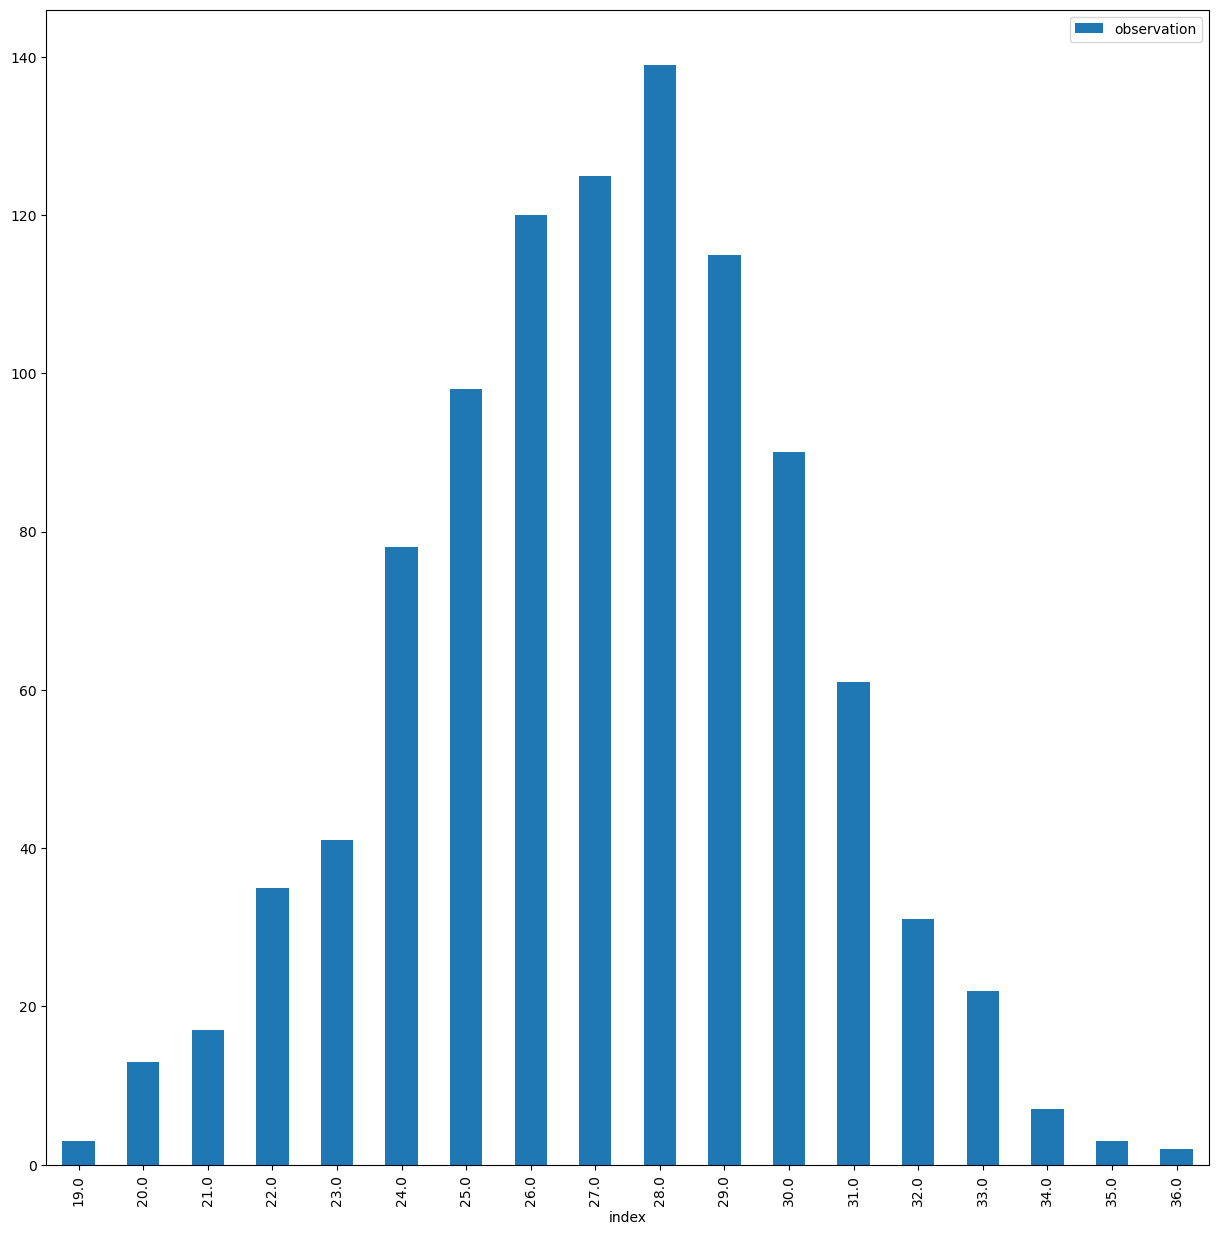

In [30]:
# your code here
ages2 = pd.read_csv(r'C:\Users\James\Downloads\ages_population2.csv')
ages2['observation'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index',figsize=(15,15));

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [31]:
# your code here
ages2['observation'].mean()

27.155

In [32]:
ages2['observation'].std()

2.969813932689186

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

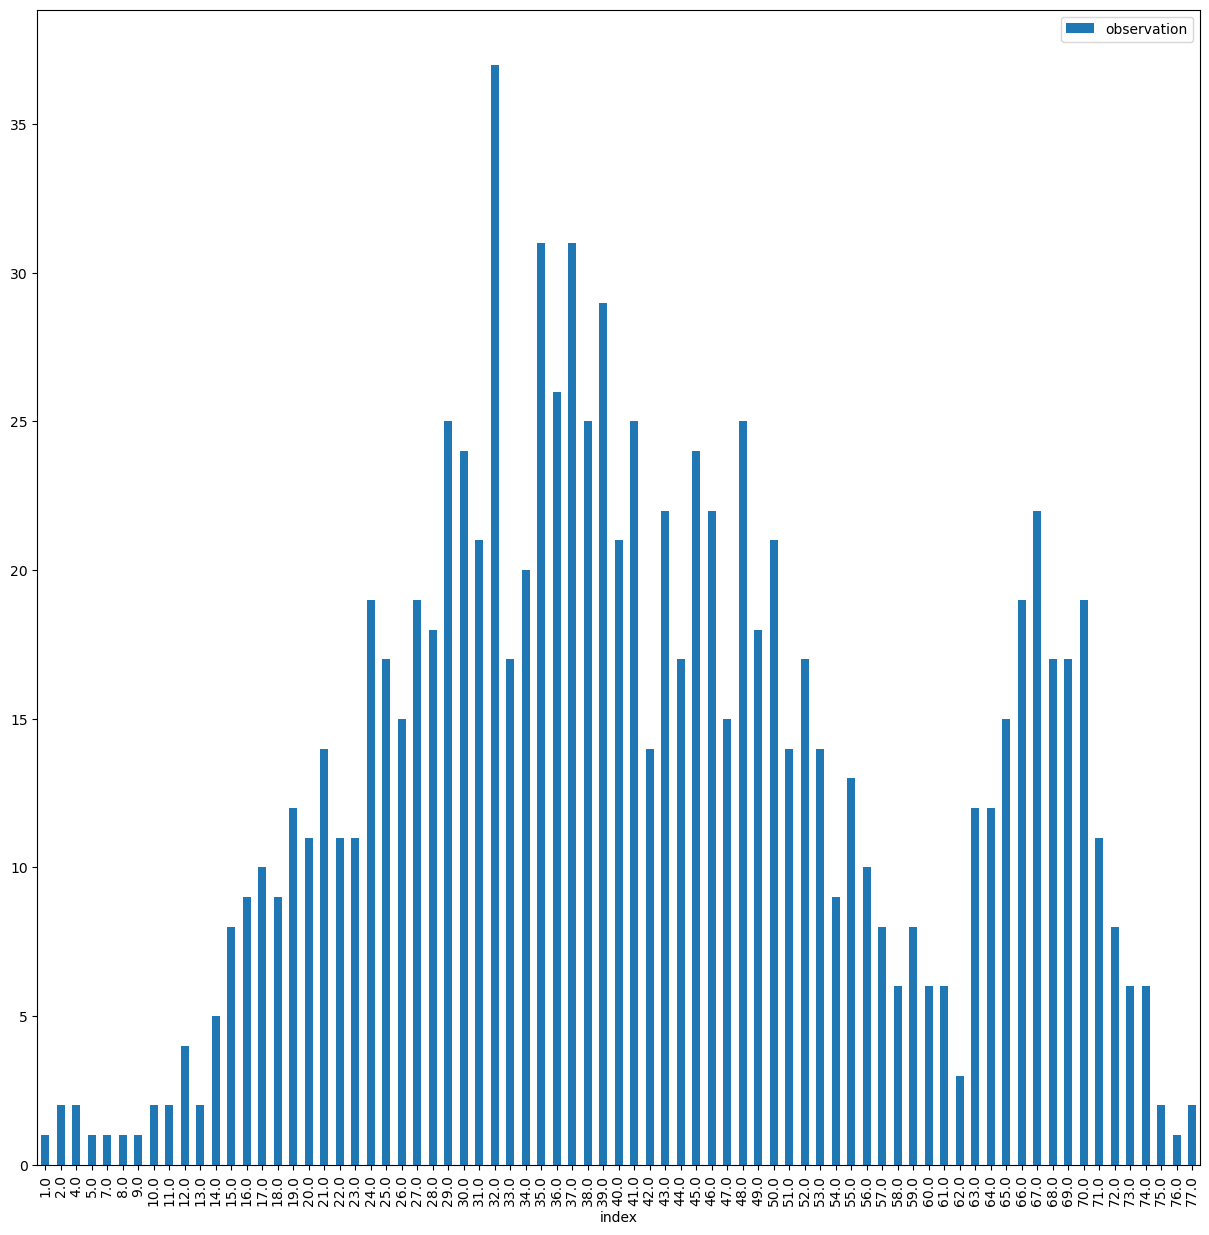

In [33]:
# your code here
ages3 = pd.read_csv(r'C:\Users\James\Downloads\ages_population3.csv')

ages3['observation'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index',figsize=(15,15));

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [34]:
# your code here
ages3['observation'].mean()

41.989

In [35]:
ages3['observation'].std()

16.144705959865934

In [ ]:
"""
your comments here:It seems like we have a bimodal distribution in this case, therefore wanting to model it and compare it to a unimodal normal distribution
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [36]:
# your code here
ages3['observation'].describe()

count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

In [ ]:
"""
your comments here: there is not big different

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [40]:
# your code here
ages3['observation'].quantile(q=0.78)

55.0

In [39]:
ages3['observation'].quantile(q=0.83)

62.0

In [41]:
ages3['observation'].quantile(q=0.3)

32.0

In [42]:
ages3['observation'].quantile(q=0.47)

39.0

In [ ]:
"""
your comments here: very small percentage of numbers between the values 55 and 62
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""